## MY CNN model test for 10-mokey-species

Test CNN model
as following the tutorial : https://www.tensorflow.org/tutorials/images/classification

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [9]:
BATCH_SIZE = 32
IMG_SIZE = (500,500)
IMG_W = 500
IMG_H = 500
# IMG_SIZE = (40,40)
# IMG_W = 40
# IMG_H = 40
# IMG_SIZE = (200,200)
# IMG_W = 200
# IMG_H = 200

In [10]:
train_dataset = image_dataset_from_directory("../10-monkey-species/training/",
                                            shuffle=True,
                                            batch_size=BATCH_SIZE,
                                            image_size=IMG_SIZE)

Found 1097 files belonging to 10 classes.


In [11]:
validation_dataset = image_dataset_from_directory("../10-monkey-species/validation/",
                                                 shuffle=True,
                                                 batch_size=BATCH_SIZE,
                                                 image_size=IMG_SIZE)

Found 272 files belonging to 10 classes.


In [12]:
class_names = train_dataset.class_names
class_names

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']

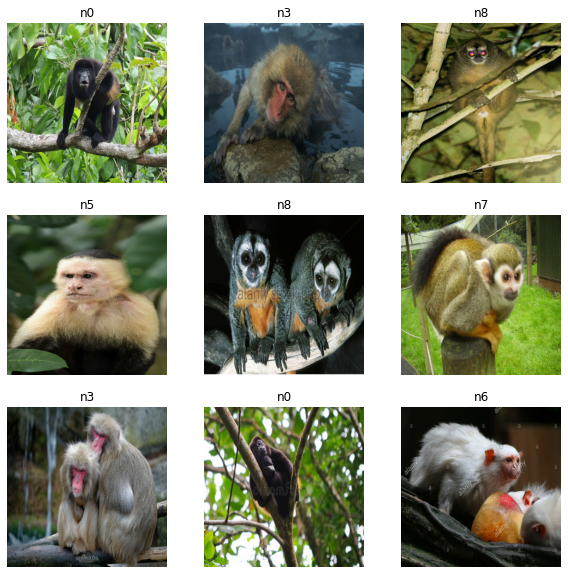

In [13]:
plt.figure(figsize=(10,10))
for images, labels in train_dataset.take(1):
    first_image=images[0]
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [15]:
for image_batch, labels_batch in train_dataset:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 500, 500, 3)
(32,)


In [8]:
first_image.shape

TensorShape([500, 500, 3])

In [16]:
# AUTOTUNE =tf.data.experimental.AUTOTUNE

# train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
# validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
# test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

AUTOTUNE =tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [33]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(IMG_H, IMG_W, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

#### Standardize the data

The RGB channel values are in the ```[0, 255]``` range. This is not ideal for a neural network; in general you should seek to make your input values small. Here, you will standardize values to be in the ```[0,1]``` range by using a Rescaling layer.

In [18]:
from tensorflow.keras import layers

In [22]:
normalized_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [50]:
num_classes = 10
model = Sequential([
#     layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_H, IMG_W, 3)),
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding = "same", activation ="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding = "same", activation ="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding = "same", activation ="relu"),
    layers.Dropout(0.2),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

In [51]:
# #### Ucohead original


# def my_model(input_shape, drop_rate): # dr0.2/
#     model = Sequential([
#         Conv2D(filters=32, input_shape=input_shape, kernel_size=(3,3), strides=2, activation = 'relu'),
#         Dropout(drop_rate),
#         Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
#         Dropout(drop_rate),
#         Dense(units=32, activation='relu')
# #         Dense(units=1, activation='softmax')
#     ])
#     return model

In [52]:
# drop_rate = 0.5 #looks it works better than 0.5

# model = my_model(first_image.shape, drop_rate)

In [53]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 500, 500, 3)       0         
_________________________________________________________________
rescaling_4 (Rescaling)      (None, 500, 500, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 500, 500, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 250, 250, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 250, 250, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 125, 125, 64)     

In [55]:
epochs=100
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs)

Epoch 1/100
35/35 [==============================] - 3s 92ms/step - loss: 3.3107 - accuracy: 0.1832 - val_loss: 2.0379 - val_accuracy: 0.2757
Epoch 2/100
35/35 [==============================] - 3s 89ms/step - loss: 1.7655 - accuracy: 0.3810 - val_loss: 1.4821 - val_accuracy: 0.4779
Epoch 3/100
35/35 [==============================] - 3s 90ms/step - loss: 1.4461 - accuracy: 0.5005 - val_loss: 1.4489 - val_accuracy: 0.4706
Epoch 4/100
35/35 [==============================] - 3s 89ms/step - loss: 1.2964 - accuracy: 0.5397 - val_loss: 1.3113 - val_accuracy: 0.5551
Epoch 5/100
35/35 [==============================] - 3s 91ms/step - loss: 1.2258 - accuracy: 0.5597 - val_loss: 1.3160 - val_accuracy: 0.5331
Epoch 6/100
35/35 [==============================] - 3s 89ms/step - loss: 1.1481 - accuracy: 0.5934 - val_loss: 1.2557 - val_accuracy: 0.5221
Epoch 7/100
35/35 [==============================] - 3s 89ms/step - loss: 1.0187 - accuracy: 0.6518 - val_loss: 1.1383 - val_accuracy: 0.5993
Epoch 

In [56]:
# prediction_layer = tf.keras.layers.Dense(10, activation="softmax")  
# #default -linear, 0.5375
# #softmax, 0.4000
# #relu, 0.6250

In [49]:
# inputs = tf.keras.Input(shape=(IMG_W, IMG_H, 3))
# # x = data_augmentation(inputs)
# x = inputs
# # x = rescale(x)
# x = model(x)
# outputs = prediction_layer(x)
# cnn_model = tf.keras.Model(inputs, outputs)

In [57]:
new_img_path = "../large.jpg"
new_img = keras.preprocessing.image.load_img(new_img_path, target_size=(IMG_H, IMG_W, 3))
img_array = keras.preprocessing.image.img_to_array(new_img)
img_array = tf.expand_dims(img_array, 0) # create a batch

prediction = model.predict(img_array)
score = tf.nn.softmax(prediction[0])

print("This image most likely belongs to {} with {:.2f} percent confidence.". format(class_names[np.argmax(score)], 100*np.max(score)))

This image most likely belongs to n1 with 97.09 percent confidence.


In [58]:
# base_lr = 0.0001
# cnn_model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_lr), 
# #                   loss = tf.keras.losses.categorical_crossentropy(from_logits=True),
#                   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#                   metrics=['accuracy'])

In [59]:
# from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping

# class TrainingCallback(Callback):
#     def on_train_begin(self, logs=None):
#         print("Starting training ...")
#     def on_train_end(self, logs=None):
#         print("Finished training!")

# early_stopping = EarlyStopping(monitor='val_accuracy', verbose=1, patience=5)

In [60]:
# initial_epochs = 200
# loss0, accuracy0 = cnn_model.evaluate(validation_dataset)

In [61]:
# print("initial loss : {:.2f}".format(loss0))
# print("initial accuracy : {:.2f}".format(accuracy0))

In [62]:
# # history = cnn_model.fit(train_dataset,
# #                        epochs=initial_epochs,
# #                        validation_data=validation_dataset,
# #                        callbacks=[TrainingCallback(), early_stopping])
# history = cnn_model.fit(train_dataset,
#                        epochs=initial_epochs,
#                        validation_data=validation_dataset,
#                        callbacks=[TrainingCallback()])

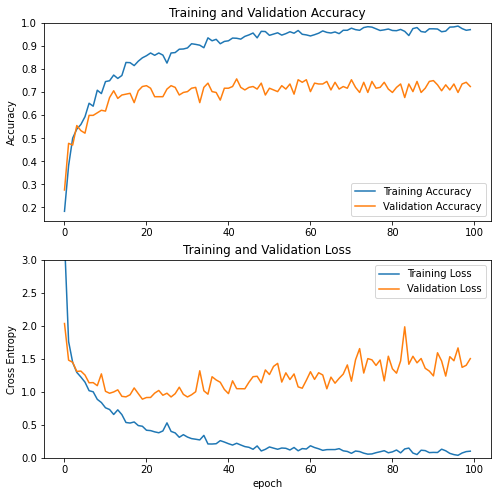

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [334]:
# import pickle
# with open("./cnn_model_test00",'wb') as file_pi:
#     pickle.dump(history_fine.history, file_pi)

In [335]:
# test_load = pickle.load(open("./cnn_model_test00",'rb'))
# test_load['loss']